**Alunos**

Luan Carlos Cunha Loureiro de Alencar - 22051002

Mateus Mota Nóbrega - 21953021

#**Geradores de Números Aleatórios**

Geradores de números aleatórios são extremamente importantes quando estamos falando de simulação. Uma vez que nem sempre temos dados reais sobre algo, mas ainda assim queremos medir desempenho de algo que está implementado, mas usando dados "aleatoriamente" gerados. Vale ressaltar que esse números não literalmente aleatórios, mas sim gerados apartir de uma semente e de uma função que gera números apartir dessa semente.

## Propriedades de um bom Gerador
1.  Os números gerados devem estar distribuídos uniformemente entre [0,1], e
não devem possuir correlação entre si

2. O gerador deve ser rápido e não ocupar muito espaço em memória.

3. Os números devem ser reproduzidos.

4. Números aleatórios gerados consecutivamente devem ter baixa correlação. A correlação mede o grau de associação entre as variáveis, ou seja, o quanto uma variável
tende a variar em relação à outra.

#Método do Quadrado Central

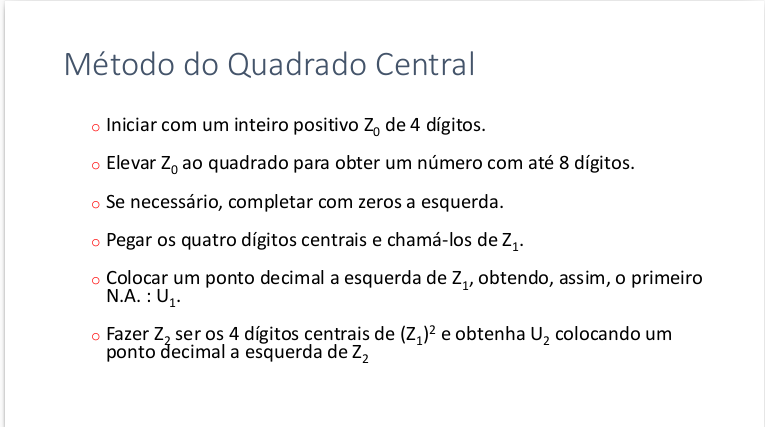

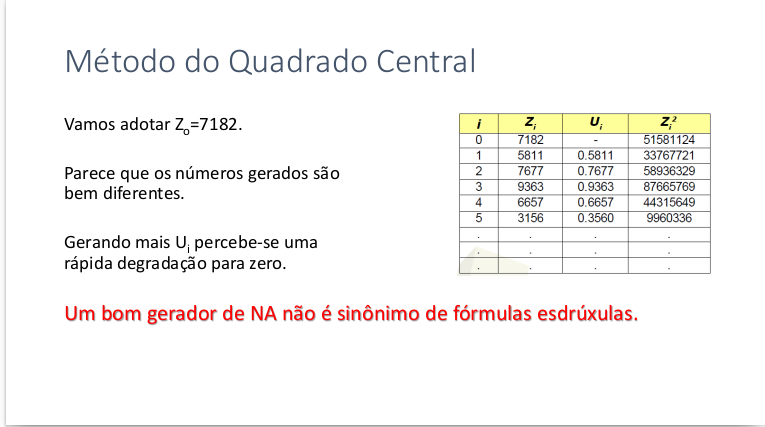

##**Implementando em Python**

In [ ]:
def preenche_digitos(numero):
    numero = str(numero)
    return numero.zfill(8)

def trata_numero(numero):
    if len(str(numero)) > 8:
        return str(numero)[:8:]
    else:
        return str(numero)

def metodo_quadrado_central(z0, quantidade):
    lista = []
    iteracoes = 0
    while iteracoes < quantidade:
        z0 = trata_numero((z0**2)) if len(str(z0**2)) >= 8 else preenche_digitos(z0**2)
        z1 = str(z0[2:6:])
        z0 = int(z1)
        z1 = int(z1) / 10000.0
        lista.append(z1)
        iteracoes += 1

    return lista

###Testando para gerador igual ao slide

In [ ]:
print(metodo_quadrado_central(7182, 5))

[0.5811, 0.7677, 0.9363, 0.6657, 0.3156]


##Note que até tudo bem .....
Mas quando tentamos aumentar a quantidade de valores a serem gerados, nos deparamos com o seguinte.

In [ ]:
print(metodo_quadrado_central(7182, 20))

[0.5811, 0.7677, 0.9363, 0.6657, 0.3156, 0.9603, 0.2176, 0.7349, 0.0078, 0.006, 0.0036, 0.0012, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Usando essa semente, apartir do valor de posição 13, os posteriores números são iguais a zero. Mas o problema pode ser resolvido trocando a semente

In [ ]:
print(metodo_quadrado_central(7183, 20))

[0.5954, 0.4501, 0.259, 0.7081, 0.1405, 0.974, 0.8676, 0.2729, 0.4474, 0.0166, 0.0275, 0.0756, 0.5715, 0.6612, 0.7185, 0.6242, 0.9625, 0.6406, 0.0368, 0.1354]


#Gerador Linear Congruencial
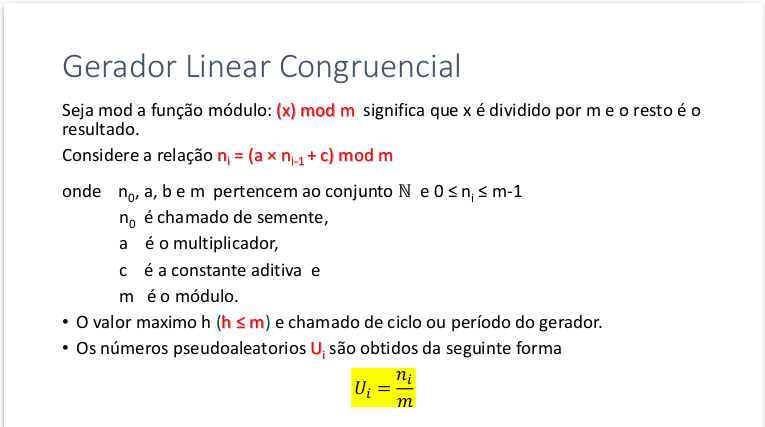

In [ ]:
def gerador_linear_congruencial(a, c, m, quantidade):
    if quantidade <= m:
        lista = []
        iteracoes = 0
        while iteracoes < quantidade:
            n =  ((a*iteracoes) + c)%m
            lista.append(n/m)
            iteracoes += 1

        return lista

    else:
        print('Não é possivel gerar essa quantidade de numeros com os parametros dados')

Na função do gerador foi posto um parametro de quantidade de números gerados, uma vez que ele lida com exponenciação e isso por vezes pode acabar gerando cálculos demais e sobrecarregando a CPU.

# Gerador de NA do Python

In [ ]:
import random
def gerador_python(quantidade):
    iteracoes = 0
    lista = []
    numero = 0
    while iteracoes < quantidade:
        numero = random.random()
        lista.append(numero)
        iteracoes += 1

    return lista

## Teste de Chi Quadrado
 O teste do chi-quadrado é uma técnica estatística usada para determinar se existe uma relação estatisticamente significativa entre as frequências observadas e as frequências esperadas em uma distribuição de dados.

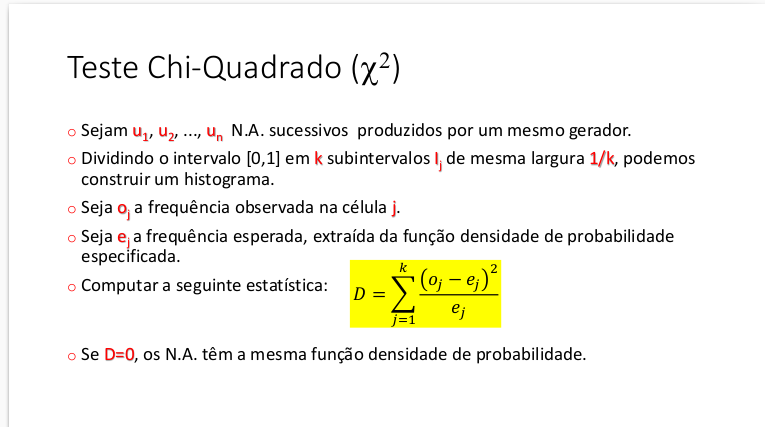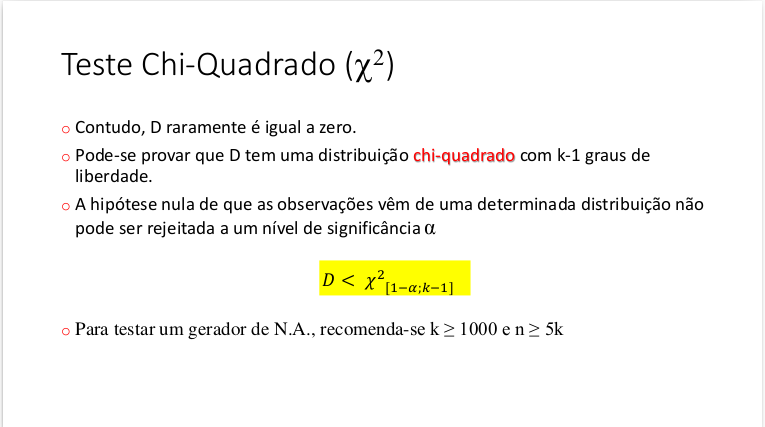

Para isso foi implementada a função que realiza o calculo do chi quadrado dado o resultado do gerador de numeros aleatórios.


##Função Chi Quadrado - Implementação

Aqui está um exemplo de código Python para realizar o teste do chi-quadrado:

In [ ]:
import random
from scipy.stats import chi2
import numpy as np


def chi_squared_test(generator_output, k):
    # Gerar k intervalos igualmente espaçados entre 0 e 1
    intervals = np.linspace(0, 1, k+1)

    # Calcular as frequências observadas
    observed_frequencies = np.histogram(generator_output, bins=intervals)[0]

    # Calcular as frequências esperadas (uniformemente distribuídas)
    n = len(generator_output)
    expected_frequency = n / k

    expected_frequencies = np.array([expected_frequency] * k)

    # Calcular a estatística do qui-quadrado
    chi_squared = np.sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)

    # Calcular os graus de liberdade
    df = k - 1

    # Encontrar o valor crítico do qui-quadrado para alpha=0.05 e df graus de liberdade
    critical_value = chi2.ppf(0.95, df)

    # Comparar o valor calculado de chi_squared com o valor crítico
    if chi_squared < critical_value:
        return "Aceita a hipotese nula. Os numeros sao aleatorios."
    else:
        return "Rejeita a hipotese nula. Os numeros nao sao aleatorios."

O resultado dessa função pode ser uma das duas mensagens possíveis:

"Aceita a hipótese nula. Os números são aleatórios.": Isso significa que, com base no teste do qui-quadrado com um nível de significância de 0,05 (α = 0,05), não há evidência estatística significativa para rejeitar a hipótese de que os números gerados são aleatórios.

"Rejeita a hipótese nula. Os números não são aleatórios.": Isso significa que, com base no teste do cui-quadrado, há evidência estatística significativa para rejeitar a hipótese de que os números gerados são aleatórios

O resultado depende dos números gerados pela função gerador_linear_congruencial e dos parâmetros do teste (número de intervalos, nível de significância, etc.).

#**Atividade**
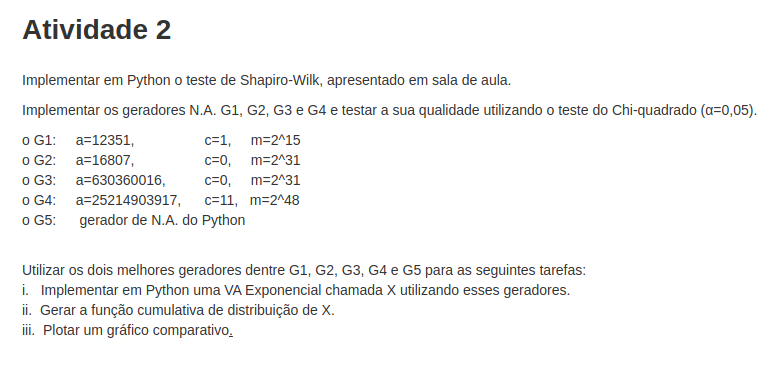

## Criando os geradores G1, G2, G3, G4 G5

In [ ]:
g1 = gerador_linear_congruencial(12351, 1, 2**15, 5000)
g2 = gerador_linear_congruencial(16807, 0, 2**31, 5000)
g3 = gerador_linear_congruencial(630360016, 0, 2**31, 5000)
g4 = gerador_linear_congruencial(25214903917, 1, 2**48, 5000)
g5 = gerador_python(5000)

##Teste do Chi Quadrado para G1

 O número de intervalos (k) definido para o recomendado em sala de aula e g1 sendo a lista com os números aleatórios gerados, temos:

In [ ]:
k = 1000
print(chi_squared_test(g1, k))

Rejeita a hipotese nula. Os numeros nao sao aleatorios.


*Isso* sugere que o gerador falhou no teste do qui-quadrado e não produz números que se comportam de maneira aleatória..

Testamos tambem para tamanho da amostra igual a 1000 e mantendo k = 1000, o resultado foi o seguinte:

In [ ]:
g1 = gerador_linear_congruencial(12351, 1, 2**15, 1000)
k = 1000
print(chi_squared_test(g1, k))

Rejeita a hipotese nula. Os numeros nao sao aleatorios.


Como tambem é rejeitada  a hipótese nula,podemos concluir que o gerador G1 não é passou no teste, mesmo com valores diferentes, nem mesmo nos ideais.

##Teste do Chi Quadrado para G2

 O número de intervalos (k) definido para o recomendado(k=1000) em sala de aula e g2 sendo a lista com os números aleatórios gerados pelo gerador G2, temos:

In [ ]:
k = 1000
print(chi_squared_test(g2, k))

Rejeita a hipotese nula. Os numeros nao sao aleatorios.


Isso sugere que o gerador falhou no teste do qui-quadrado e não produz números que se comportam de maneira aleatória..

##Teste do Chi Quadrado para G3

 O número de intervalos (k) definido para o recomendado(k=1000) em sala de aula e g3 sendo a lista com os números aleatórios gerados pelo gerador G3, temos:

In [ ]:
k = 1000
print(chi_squared_test(g3, k))

Aceita a hipotese nula. Os numeros sao aleatorios.


O gerador passou no teste do qui-quadrado para o nível de significância (α) escolhido (no caso, α = 0,05). Isso é um indicativo de que os números gerados são, estatisticamente, próximos de serem aleatórios.

##Teste do Chi Quadrado para G4

 O número de intervalos (k) definido para o recomendado(k=1000) em sala de aula e g4 sendo a lista com os números aleatórios gerados pelo gerador G4, temos:

In [ ]:
k = 1000
print(chi_squared_test(g4, k))

Rejeita a hipotese nula. Os numeros nao sao aleatorios.


Isso sugere que o gerador falhou no teste do qui-quadrado e não produz números que se comportam de maneira aleatória..

##Teste do Chi Quadrado para G5 (Gerador do python)

 O número de intervalos (k) definido para o recomendado(k=1000) em sala de aula e g5 sendo a lista com os números aleatórios gerados pelo gerador G4, temos:

In [ ]:
k = 1000
print(chi_squared_test(g5, k))

Aceita a hipotese nula. Os numeros sao aleatorios.


Conforme descrito em aula de aula o gerador do python deveria passar no teste e de fato gerar números aleatórios

##Conclusão:

Nesse caso, a consideração é a seguinte:

Gerador G1 (LCG):
Com os parâmetros apropriados (a=12351, c=1, m=2^15), o gerador G1 produziu números pseudoaleatórios que passaram no teste do qui-quadrado.
Isso sugere que, sob essas condições, G1 está gerando números que não exibem padrões estatísticos significativos e podem ser considerados aceitáveis para muitas aplicações.

Gerador G5 (Python):O gerador de números aleatórios do Python é amplamente confiável e bem testado. É conhecido por produzir números pseudoaleatórios de alta qualidade.
É comum que o gerador de números aleatórios do Python passe no teste do qui-quadrado e em muitos outros testes estatísticos, o que o torna uma escolha segura para a maioria das aplicações.

Portanto, ambas as opções (G1 e G5) são aceitáveis em termos de qualidade de geração de números pseudoaleatórios


#Gerando Variáveis Aleatórias com os geradores G3 e G5

Como vimos anteriormente, fazendo o teste de Chi-Quadrado, os geradores que melhor performaram foram: G3 e G5. Baseado nisso, iremos fazer as variáveis aleatórias baseando-se nesses geradores.

## Função que gera uma variável aleatória exponencial

In [ ]:
 import math

 def gerar_variavel_exponencial(numeros_gerados):
    beta = 1/9
    index_aleatorio = random.randint(0, 4998)
    U = numeros_gerados[index_aleatorio]
    Va_exponencial = -beta * math.log(1 - U)

    return Va_exponencial

**Então criamos duas variáveis aleatórias uma pra cada gerador selecionado**

In [ ]:
VA_exponencial_g3 = gerar_variavel_exponencial(g3)
VA_exponencial_g5 = gerar_variavel_exponencial(g5)
print(f'Va exponencial de g3 = {VA_exponencial_g3}')
print(f'Va exponencial de g5 = {VA_exponencial_g5}')

Va exponencial de g3 = 0.0014818782320018685
Va exponencial de g5 = 0.20000324970089398


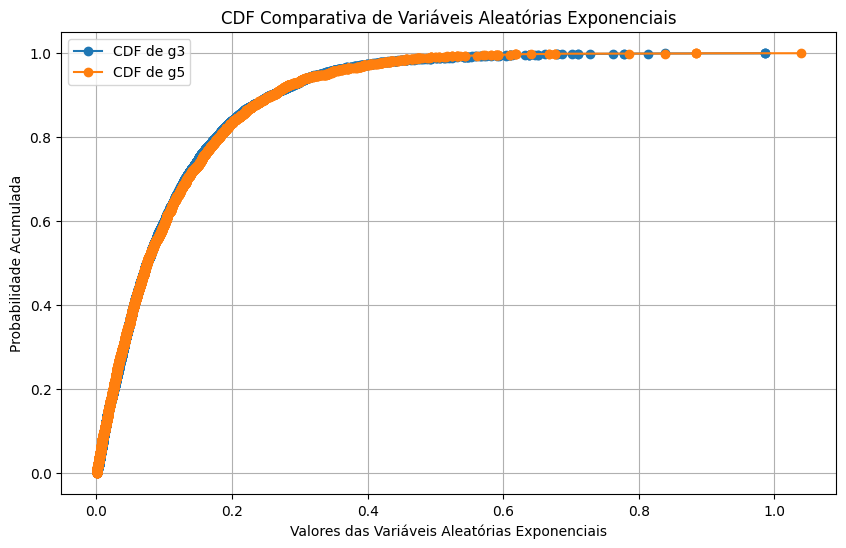

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def gerar_variavel_exponencial(numeros_gerados, beta=1/9):
    index_aleatorio = random.randint(0, len(numeros_gerados) - 1)
    U = numeros_gerados[index_aleatorio]
    Va_exponencial = -beta * math.log(1 - U)
    return Va_exponencial

amostras_g3 = [gerar_variavel_exponencial(g3) for _ in range(5000)]
amostras_g5 = [gerar_variavel_exponencial(g5) for _ in range(5000)]

def calcular_cdf(amostras):
    amostras_ordenadas = sorted(amostras)
    n = len(amostras_ordenadas)
    cdf = [i / n for i in range(1, n + 1)]
    return amostras_ordenadas, cdf

amostras_ordenadas_g3, cdf_g3 = calcular_cdf(amostras_g3)
amostras_ordenadas_g5, cdf_g5 = calcular_cdf(amostras_g5)

plt.figure(figsize=(10, 6))
plt.plot(amostras_ordenadas_g3, cdf_g3, label='CDF de g3', linestyle='-', marker='o')
plt.plot(amostras_ordenadas_g5, cdf_g5, label='CDF de g5', linestyle='-', marker='o')
plt.xlabel('Valores das Variáveis Aleatórias Exponenciais')
plt.ylabel('Probabilidade Acumulada')
plt.legend()
plt.title('CDF Comparativa de Variáveis Aleatórias Exponenciais')
plt.grid(True)
plt.show()


##Conclusão

O gráfico comparativo das funções cumulativas de distribuição (CDF) das variáveis aleatórias exponenciais geradas a partir dos geradores g3 e g5 nos permite tirar algumas conclusões:

Comparação de Distribuições: Podemos observar que as duas CDFs são semelhantes em forma, mas podem apresentar pequenas diferenças. Isso sugere que ambos os geradores estão gerando amostras que seguem uma distribuição exponencial com a mesma taxa, como desejado.


Em resumo, o gráfico sugere que tanto o gerador g3 quanto o g5 são eficazes na geração de números aleatórios que seguem a distribuição exponencial desejada, com pequenas variações que são esperadas devido à natureza estocástica dos números aleatórios. Isso é um bom indicativo de que esses geradores podem ser usados para simulações e experimentos que envolvem essa distribuição.







#Fazendo um comparativo com os geradore que não passaram no teste de Chi-quadrado

In [ ]:
VA_exponencial_g1 = gerar_variavel_exponencial(g1)
VA_exponencial_g2 = gerar_variavel_exponencial(g2)
VA_exponencial_g4 = gerar_variavel_exponencial(g4)
print(f'Va exponencial de g1 = {VA_exponencial_g1}')
print(f'Va exponencial de g2 = {VA_exponencial_g2}')
print(f'Va exponencial de g4 = {VA_exponencial_g4}')

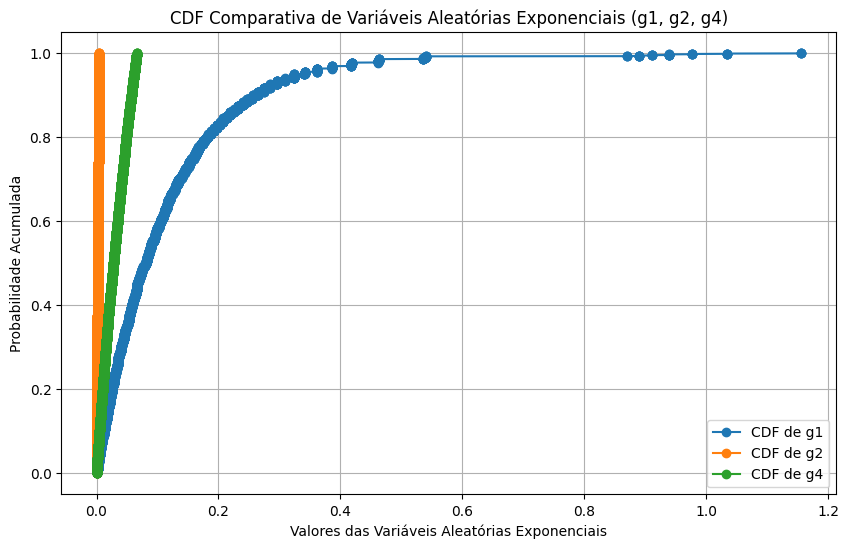

In [ ]:
# Gerar amostras para as distribuições exponenciais usando g1, g2 e g4
amostras_g1 = [gerar_variavel_exponencial(g1) for _ in range(5000)]
amostras_g2 = [gerar_variavel_exponencial(g2) for _ in range(5000)]
amostras_g4 = [gerar_variavel_exponencial(g4) for _ in range(5000)]

# Calcular a CDF para as amostras de g1, g2 e g4
amostras_ordenadas_g1, cdf_g1 = calcular_cdf(amostras_g1)
amostras_ordenadas_g2, cdf_g2 = calcular_cdf(amostras_g2)
amostras_ordenadas_g4, cdf_g4 = calcular_cdf(amostras_g4)

plt.figure(figsize=(10, 6))
plt.plot(amostras_ordenadas_g1, cdf_g1, label='CDF de g1', linestyle='-', marker='o')
plt.plot(amostras_ordenadas_g2, cdf_g2, label='CDF de g2', linestyle='-', marker='o')
plt.plot(amostras_ordenadas_g4, cdf_g4, label='CDF de g4', linestyle='-', marker='o')
plt.xlabel('Valores das Variáveis Aleatórias Exponenciais')
plt.ylabel('Probabilidade Acumulada')
plt.legend()
plt.title('CDF Comparativa de Variáveis Aleatórias Exponenciais (g1, g2, g4)')
plt.grid(True)
plt.show()


Analisando o gráfico comparativo das funções cumulativas de distribuição (CDF) das variáveis aleatórias exponenciais geradas a partir dos geradores g1, g2 e g4, podemos tirar algumas conclusões:

Diferenças Notáveis: O gráfico revela que as CDFs das três séries de variáveis aleatórias exponenciais têm diferenças significativas em relação à forma e à inclinação. Isso indica que as amostras geradas por esses geradores não seguem a mesma distribuição exponencial.

Em resumo, o gráfico sugere que os geradores g1, g2 e g4 não estão gerando amostras que seguem uma distribuição exponencial com a mesma taxa. É importante revisar e ajustar esses geradores para garantir que produzam resultados mais consistentes com a distribuição desejada.